# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [42]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 300

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 300 total reviews
Scraping page 2
   ---> 600 total reviews
Scraping page 3
   ---> 900 total reviews
Scraping page 4
   ---> 1200 total reviews
Scraping page 5
   ---> 1500 total reviews
Scraping page 6
   ---> 1800 total reviews
Scraping page 7
   ---> 2100 total reviews
Scraping page 8
   ---> 2400 total reviews
Scraping page 9
   ---> 2700 total reviews
Scraping page 10
   ---> 3000 total reviews


In [43]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | My wife and I are very disappointed with flying on British Airways. Our flight on 9/12 was cancelled while all other airlines were flying. In addition, our seats changed multiple times without any explanation. The people working were very rude and not at all customer oriented."
1,"Not Verified | We flew BA between Heathrow and Berlin one way connection. Our experience with BA ground staff at Heathrow was very good, friendly and helpful at check in and baggage drop off. The crew on our flight were also very good, Captain provided some general information and welcoming in a suitable casual but efficient way. Flight stewards were also very friendly and handed out some water and small snack (chocolate bar) unexpected on a 1 hr 20 min flight. Seating was typical for class of aircraft and ticket. Cleanliness was not optimal and could be improved. From memory a slightly delayed departure from Heathrow, which was slightly reduced on arrival at Berlin. This was not an issue for us as Berlin was our destination with no connecting concerns. Our baggage arrived safely at Berlin. I understand BA has had some very negative reviews by customers but our experience on this occasion was very positive and would happily recommend and use BA."
2,Not Verified | Absolutely disgusted with BA. Our flights were cancelled on 1 May by BA even though the flight still departed. We had a connecting flight from Manchester to Heathrow which was cancelled due to weather so could not get compensation for that flight. But now it turns out we cannot get compensation for our flight to Seattle either even though BA actually cancelled it for us. I will never fly with them again.
3,Not Verified | Took a trip to Nashville with my wife for a leisure break. Arrived at T5 and directed to the Club World check in zone to the left of the terminal. Zone seemed way too small for the number of passengers and the check in process was painfully slow. Queues for non premium cabins seemed to be much more effectively managed. Had a bite to eat at the departures lounge. Plenty of food options even though it was very busy. Flight departed from the furthest away satellite gate in C annex. Boarding was managed efficiently. I was in seat 4A in the Club Suites section. Lots of space and comfortable. Crew were + 40 on average and very friendly and attentive. I chose a salmon dish and was glad I was in 3A as they had run out by row 4! Entertainment was a little disappointing in terms of latest release movies. Meal prior to landing was not to my taste so I skipped it. Flight landed right on schedule so no complaints on that basis.
4,"Not Verified | A nightmare journey courtesy of British Airways. Our worst flight experience in over 50 years of flying! We were booked on BA470 scheduled to depart Heathrow at 12.05 on 5 Sept - we boarded 1.5 hrs late because despite the plane being at the gate we had to wait for a crew to arrive. Approximately 1hr into the flight the pilot advised that as the weather radar wasn't working, we would be returning to Heathrow where we circled for approx 45 mins before landing. There was no member of staff present to offer advice about an alternative flights and the customer service desk stated they would not deal with it but we had to await an email. An email finally arrived after about an hour and my husband and I were fortunate enough to be allocated seats on the 21.15 flight. This time we boarded approx 2 hrs late again the plane was at the gate but we had to wait for a crew. As a result it was around 3.00 am before we reached Venice and the long wait for taxis meant that we didn't reach out hotel beyond Mestre until 4.00 am. We've since learnt that BA have cancelled hundreds of flights over the past several days claiming 'bad weather' yet according to FlightRadar 24 no other airline flying out of Heathrow cancelled flights"


In [44]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [45]:
df = pd.read_csv('BA_reviews.csv')

In [46]:
df.head()

,Unnamed: 0,reviews
0,0,"Not Verified | My wife and I are very disappointed with flying on British Airways. Our flight on 9/12 was cancelled while all other airlines were flying. In addition, our seats changed multiple times without any explanation. The people working were very rude and not at all customer oriented."
1,1,"Not Verified | We flew BA between Heathrow and Berlin one way connection. Our experience with BA ground staff at Heathrow was very good, friendly and helpful at check in and baggage drop off. The crew on our flight were also very good, Captain provided some general information and welcoming in a suitable casual but efficient way. Flight stewards were also very friendly and handed out some water and small snack (chocolate bar) unexpected on a 1 hr 20 min flight. Seating was typical for class of aircraft and ticket. Cleanliness was not optimal and could be improved. From memory a slightly delayed departure from Heathrow, which was slightly reduced on arrival at Berlin. This was not an issue for us as Berlin was our destination with no connecting concerns. Our baggage arrived safely at Berlin. I understand BA has had some very negative reviews by customers but our experience on this occasion was very positive and would happily recommend and use BA."
2,2,Not Verified | Absolutely disgusted with BA. Our flights were cancelled on 1 May by BA even though the flight still departed. We had a connecting flight from Manchester to Heathrow which was cancelled due to weather so could not get compensation for that flight. But now it turns out we cannot get compensation for our flight to Seattle either even though BA actually cancelled it for us. I will never fly with them again.
3,3,Not Verified | Took a trip to Nashville with my wife for a leisure break. Arrived at T5 and directed to the Club World check in zone to the left of the terminal. Zone seemed way too small for the number of passengers and the check in process was painfully slow. Queues for non premium cabins seemed to be much more effectively managed. Had a bite to eat at the departures lounge. Plenty of food options even though it was very busy. Flight departed from the furthest away satellite gate in C annex. Boarding was managed efficiently. I was in seat 4A in the Club Suites section. Lots of space and comfortable. Crew were + 40 on average and very friendly and attentive. I chose a salmon dish and was glad I was in 3A as they had run out by row 4! Entertainment was a little disappointing in terms of latest release movies. Meal prior to landing was not to my taste so I skipped it. Flight landed right on schedule so no complaints on that basis.
4,4,"Not Verified | A nightmare journey courtesy of British Airways. Our worst flight experience in over 50 years of flying! We were booked on BA470 scheduled to depart Heathrow at 12.05 on 5 Sept - we boarded 1.5 hrs late because despite the plane being at the gate we had to wait for a crew to arrive. Approximately 1hr into the flight the pilot advised that as the weather radar wasn't working, we would be returning to Heathrow where we circled for approx 45 mins before landing. There was no member of staff present to offer advice about an alternative flights and the customer service desk stated they would not deal with it but we had to await an email. An email finally arrived after about an hour and my husband and I were fortunate enough to be allocated seats on the 21.15 flight. This time we boarded approx 2 hrs late again the plane was at the gate but we had to wait for a crew. As a result it was around 3.00 am before we reached Venice and the long wait for taxis meant that we didn't reach out hotel beyond Mestre until 4.00 am. We've since learnt that BA have cancelled hundreds of flights over the past several days claiming 'bad weather' yet according to FlightRadar 24 no other airline flying out of Heathrow cancelled flights"


In [47]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
!pip install wordcloud nltk

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ------- ------------------------------- 61.4/301.4 kB 825.8 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/301.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------- ------- 245.8/301.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.3 MB/s eta 0:00:00


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import nltk
%matplotlib inline

In [49]:
pd.set_option('display.max_colwidth', None)

In [50]:
df.head()

,reviews
0,"Not Verified | My wife and I are very disappointed with flying on British Airways. Our flight on 9/12 was cancelled while all other airlines were flying. In addition, our seats changed multiple times without any explanation. The people working were very rude and not at all customer oriented."
1,"Not Verified | We flew BA between Heathrow and Berlin one way connection. Our experience with BA ground staff at Heathrow was very good, friendly and helpful at check in and baggage drop off. The crew on our flight were also very good, Captain provided some general information and welcoming in a suitable casual but efficient way. Flight stewards were also very friendly and handed out some water and small snack (chocolate bar) unexpected on a 1 hr 20 min flight. Seating was typical for class of aircraft and ticket. Cleanliness was not optimal and could be improved. From memory a slightly delayed departure from Heathrow, which was slightly reduced on arrival at Berlin. This was not an issue for us as Berlin was our destination with no connecting concerns. Our baggage arrived safely at Berlin. I understand BA has had some very negative reviews by customers but our experience on this occasion was very positive and would happily recommend and use BA."
2,Not Verified | Absolutely disgusted with BA. Our flights were cancelled on 1 May by BA even though the flight still departed. We had a connecting flight from Manchester to Heathrow which was cancelled due to weather so could not get compensation for that flight. But now it turns out we cannot get compensation for our flight to Seattle either even though BA actually cancelled it for us. I will never fly with them again.
3,Not Verified | Took a trip to Nashville with my wife for a leisure break. Arrived at T5 and directed to the Club World check in zone to the left of the terminal. Zone seemed way too small for the number of passengers and the check in process was painfully slow. Queues for non premium cabins seemed to be much more effectively managed. Had a bite to eat at the departures lounge. Plenty of food options even though it was very busy. Flight departed from the furthest away satellite gate in C annex. Boarding was managed efficiently. I was in seat 4A in the Club Suites section. Lots of space and comfortable. Crew were + 40 on average and very friendly and attentive. I chose a salmon dish and was glad I was in 3A as they had run out by row 4! Entertainment was a little disappointing in terms of latest release movies. Meal prior to landing was not to my taste so I skipped it. Flight landed right on schedule so no complaints on that basis.
4,"Not Verified | A nightmare journey courtesy of British Airways. Our worst flight experience in over 50 years of flying! We were booked on BA470 scheduled to depart Heathrow at 12.05 on 5 Sept - we boarded 1.5 hrs late because despite the plane being at the gate we had to wait for a crew to arrive. Approximately 1hr into the flight the pilot advised that as the weather radar wasn't working, we would be returning to Heathrow where we circled for approx 45 mins before landing. There was no member of staff present to offer advice about an alternative flights and the customer service desk stated they would not deal with it but we had to await an email. An email finally arrived after about an hour and my husband and I were fortunate enough to be allocated seats on the 21.15 flight. This time we boarded approx 2 hrs late again the plane was at the gate but we had to wait for a crew. As a result it was around 3.00 am before we reached Venice and the long wait for taxis meant that we didn't reach out hotel beyond Mestre until 4.00 am. We've since learnt that BA have cancelled hundreds of flights over the past several days claiming 'bad weather' yet according to FlightRadar 24 no other airline flying out of Heathrow cancelled flights"


In [51]:
# Correcting the split method, remove the 1 as it's part of the function parameters
df['extracted_reviews'] = df['reviews'].str.split('|').str[1]

In [52]:
df.drop('reviews',axis=1,inplace=True)

In [53]:
df.head()

,extracted_reviews
0,"My wife and I are very disappointed with flying on British Airways. Our flight on 9/12 was cancelled while all other airlines were flying. In addition, our seats changed multiple times without any explanation. The people working were very rude and not at all customer oriented."
1,"We flew BA between Heathrow and Berlin one way connection. Our experience with BA ground staff at Heathrow was very good, friendly and helpful at check in and baggage drop off. The crew on our flight were also very good, Captain provided some general information and welcoming in a suitable casual but efficient way. Flight stewards were also very friendly and handed out some water and small snack (chocolate bar) unexpected on a 1 hr 20 min flight. Seating was typical for class of aircraft and ticket. Cleanliness was not optimal and could be improved. From memory a slightly delayed departure from Heathrow, which was slightly reduced on arrival at Berlin. This was not an issue for us as Berlin was our destination with no connecting concerns. Our baggage arrived safely at Berlin. I understand BA has had some very negative reviews by customers but our experience on this occasion was very positive and would happily recommend and use BA."
2,Absolutely disgusted with BA. Our flights were cancelled on 1 May by BA even though the flight still departed. We had a connecting flight from Manchester to Heathrow which was cancelled due to weather so could not get compensation for that flight. But now it turns out we cannot get compensation for our flight to Seattle either even though BA actually cancelled it for us. I will never fly with them again.
3,Took a trip to Nashville with my wife for a leisure break. Arrived at T5 and directed to the Club World check in zone to the left of the terminal. Zone seemed way too small for the number of passengers and the check in process was painfully slow. Queues for non premium cabins seemed to be much more effectively managed. Had a bite to eat at the departures lounge. Plenty of food options even though it was very busy. Flight departed from the furthest away satellite gate in C annex. Boarding was managed efficiently. I was in seat 4A in the Club Suites section. Lots of space and comfortable. Crew were + 40 on average and very friendly and attentive. I chose a salmon dish and was glad I was in 3A as they had run out by row 4! Entertainment was a little disappointing in terms of latest release movies. Meal prior to landing was not to my taste so I skipped it. Flight landed right on schedule so no complaints on that basis.
4,"A nightmare journey courtesy of British Airways. Our worst flight experience in over 50 years of flying! We were booked on BA470 scheduled to depart Heathrow at 12.05 on 5 Sept - we boarded 1.5 hrs late because despite the plane being at the gate we had to wait for a crew to arrive. Approximately 1hr into the flight the pilot advised that as the weather radar wasn't working, we would be returning to Heathrow where we circled for approx 45 mins before landing. There was no member of staff present to offer advice about an alternative flights and the customer service desk stated they would not deal with it but we had to await an email. An email finally arrived after about an hour and my husband and I were fortunate enough to be allocated seats on the 21.15 flight. This time we boarded approx 2 hrs late again the plane was at the gate but we had to wait for a crew. As a result it was around 3.00 am before we reached Venice and the long wait for taxis meant that we didn't reach out hotel beyond Mestre until 4.00 am. We've since learnt that BA have cancelled hundreds of flights over the past several days claiming 'bad weather' yet according to FlightRadar 24 no other airline flying out of Heathrow cancelled flights"


In [54]:
import re
import string

# Function to clean the text, handling non-string values
def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
        return text
    else:
        return ''  # Return an empty string for non-string values

# Apply the function to your reviews column
df['clean_reviews'] = df['extracted_reviews'].apply(clean_text)


In [55]:
df.head()

,extracted_reviews,clean_reviews
0,"My wife and I are very disappointed with flying on British Airways. Our flight on 9/12 was cancelled while all other airlines were flying. In addition, our seats changed multiple times without any explanation. The people working were very rude and not at all customer oriented.",my wife and i are very disappointed with flying on british airways our flight on was cancelled while all other airlines were flying in addition our seats changed multiple times without any explanation the people working were very rude and not at all customer oriented
1,"We flew BA between Heathrow and Berlin one way connection. Our experience with BA ground staff at Heathrow was very good, friendly and helpful at check in and baggage drop off. The crew on our flight were also very good, Captain provided some general information and welcoming in a suitable casual but efficient way. Flight stewards were also very friendly and handed out some water and small snack (chocolate bar) unexpected on a 1 hr 20 min flight. Seating was typical for class of aircraft and ticket. Cleanliness was not optimal and could be improved. From memory a slightly delayed departure from Heathrow, which was slightly reduced on arrival at Berlin. This was not an issue for us as Berlin was our destination with no connecting concerns. Our baggage arrived safely at Berlin. I understand BA has had some very negative reviews by customers but our experience on this occasion was very positive and would happily recommend and use BA.",we flew ba between heathrow and berlin one way connection our experience with ba ground staff at heathrow was very good friendly and helpful at check in and baggage drop off the crew on our flight were also very good captain provided some general information and welcoming in a suitable casual but efficient way flight stewards were also very friendly and handed out some water and small snack chocolate bar unexpected on a hr min flight seating was typical for class of aircraft and ticket cleanliness was not optimal and could be improved from memory a slightly delayed departure from heathrow which was slightly reduced on arrival at berlin this was not an issue for us as berlin was our destination with no connecting concerns our baggage arrived safely at berlin i understand ba has had some very negative reviews by customers but our experience on this occasion was very positive and would happily recommend and use ba
2,Absolutely disgusted with BA. Our flights were cancelled on 1 May by BA even though the flight still departed. We had a connecting flight from Manchester to Heathrow which was cancelled due to weather so could not get compensation for that flight. But now it turns out we cannot get compensation for our flight to Seattle either even though BA actually cancelled it for us. I will never fly with them again.,absolutely disgusted with ba our flights were cancelled on may by ba even though the flight still departed we had a connecting flight from manchester to heathrow which was cancelled due to weather so could not get compensation for that flight but now it turns out we cannot get compensation for our flight to seattle either even though ba actually cancelled it for us i will never fly with them again
3,Took a trip to Nashville with my wife for a leisure break. Arrived at T5 and directed to the Club World check in zone to the left of the terminal. Zone seemed way too small for the number of passengers and the check in process was painfully slow. Queues for non premium cabins seemed to be much more effectively managed. Had a bite to eat at the departures lounge. Plenty of food options even though it was very busy. Flight departed from the furthest away satellite gate in C annex. Boarding was managed efficiently. I was in seat 4A in the Club Suites section. Lots of space and comfortable. Crew were + 40 on average and very friendly and attentive. I chose a salmon dish and was glad I was in 3A as they had run out by row 4! 

In [26]:
!pip install textblob

In [56]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

df['sentiment'] = df['clean_reviews'].apply(get_sentiment)



In [57]:
# Categorize the sentiment as Positive, Negative, or Neutral
df['sentiment_label'] = df['sentiment'].apply(lambda x:'Positive' if x>0 else 'Negative' if x<0 else 'Neutral')

In [58]:
df.head()

,extracted_reviews,clean_reviews,sentiment,sentiment_label
0,"My wife and I are very disappointed with flying on British Airways. Our flight on 9/12 was cancelled while all other airlines were flying. In addition, our seats changed multiple times without any explanation. The people working were very rude and not at all customer oriented.",my wife and i are very disappointed with flying on british airways our flight on was cancelled while all other airlines were flying in addition our seats changed multiple times without any explanation the people working were very rude and not at all customer oriented,-0.298000,Negative
1,"We flew BA between Heathrow and Berlin one way connection. Our experience with BA ground staff at Heathrow was very good, friendly and helpful at check in and baggage drop off. The crew on our flight were also very good, Captain provided some general information and welcoming in a suitable casual but efficient way. Flight stewards were also very friendly and handed out some water and small snack (chocolate bar) unexpected on a 1 hr 20 min flight. Seating was typical for class of aircraft and ticket. Cleanliness was not optimal and could be improved. From memory a slightly delayed departure from Heathrow, which was slightly reduced on arrival at Berlin. This was not an issue for us as Berlin was our destination with no connecting concerns. Our baggage arrived safely at Berlin. I understand BA has had some very negative reviews by customers but our experience on this occasion was very positive and would happily recommend and use BA.",we flew ba between heathrow and berlin one way connection our experience with ba ground staff at heathrow was very good friendly and helpful at check in and baggage drop off the crew on our flight were also very good captain provided some general information and welcoming in a suitable casual but efficient way flight stewards were also very friendly and handed out some water and small snack chocolate bar unexpected on a hr min flight seating was typical for class of aircraft and ticket cleanliness was not optimal and could be improved from memory a slightly delayed departure from heathrow which was slightly reduced on arrival at berlin this was not an issue for us as berlin was our destination with no connecting concerns our baggage arrived safely at berlin i understand ba has had some very negative reviews by customers but our experience on this occasion was very positive and would happily recommend and use ba,0.208622,Positive
2,Absolutely disgusted with BA. Our flights were cancelled on 1 May by BA even though the flight still departed. We had a connecting flight from Manchester to Heathrow which was cancelled due to weather so could not get compensation for that flight. But now it turns out we cannot get compensation for our flight to Seattle either even though BA actually cancelled it for us. I will never fly with them again.,absolutely disgusted with ba our flights were cancelled on may by ba even though the flight still departed we had a connecting flight from manchester to heathrow which was cancelled due to weather so could not get compensation for that flight but now it turns out we cannot get compensation for our flight to seattle either even though ba actually cancelled it for us i will never fly with them again,-0.381250,Negative
3,Took a trip to Nashville with my wife for a leisure break. Arrived at T5 and directed to the Club World check in zone to the left of the terminal. Zone seemed way too small for the number of passengers and the check in process was painfully slow. Queues for non premium cabins seemed to be much more effectively managed. Had a bite to eat at the departures lounge. Plenty of food options even though it was very busy. Flight departed from the furthest away satellite gate in C annex. Boarding was managed efficiently. I was in seat 4A in the Club Suites section. Lots of space and comfortable. Crew were + 40 on average and very friendly and attent

In [59]:
!pip install gensim

## Performing LDA(Latent Dirichlet Allocation)

In [60]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = stopwords.words('english')

# Tokenize and remove stopwords
df['tokenized_reviews'] = df['clean_reviews'].apply(lambda x: [word for word in x.split() if word not in stop_words])

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['tokenized_reviews'])
corpus = [dictionary.doc2bow(review) for review in df['tokenized_reviews']]

# Apply LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print topics
topics = lda_model.print_topics()
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to C:\Users\Bishal
[nltk_data]     Roy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.022*"seat" + 0.015*"seats" + 0.011*"business" + 0.011*"class" + 0.005*"london" + 0.005*"good" + 0.005*"flight" + 0.005*"aisle" + 0.005*"ba" + 0.004*"airways"')
(1, '0.031*"flight" + 0.016*"ba" + 0.009*"british" + 0.009*"us" + 0.009*"told" + 0.009*"london" + 0.009*"airways" + 0.008*"hours" + 0.007*"would" + 0.007*"get"')
(2, '0.019*"ba" + 0.011*"flight" + 0.006*"service" + 0.006*"customer" + 0.005*"seat" + 0.004*"one" + 0.004*"airline" + 0.004*"back" + 0.004*"get" + 0.004*"fly"')
(3, '0.006*"airways" + 0.005*"british" + 0.005*"us" + 0.003*"stroller" + 0.003*"london" + 0.003*"baby" + 0.003*"made" + 0.003*"bags" + 0.003*"fact" + 0.003*"luggage"')
(4, '0.020*"flight" + 0.015*"ba" + 0.011*"service" + 0.010*"food" + 0.010*"crew" + 0.009*"cabin" + 0.008*"london" + 0.008*"class" + 0.008*"seat" + 0.008*"good"')


## Using WordCloud to visualize the most frequent words in the reviews



In [62]:
from wordcloud import WordCloud

all_words = " ".join([text for text in df['clean_reviews']])
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=110).generate(all_words)



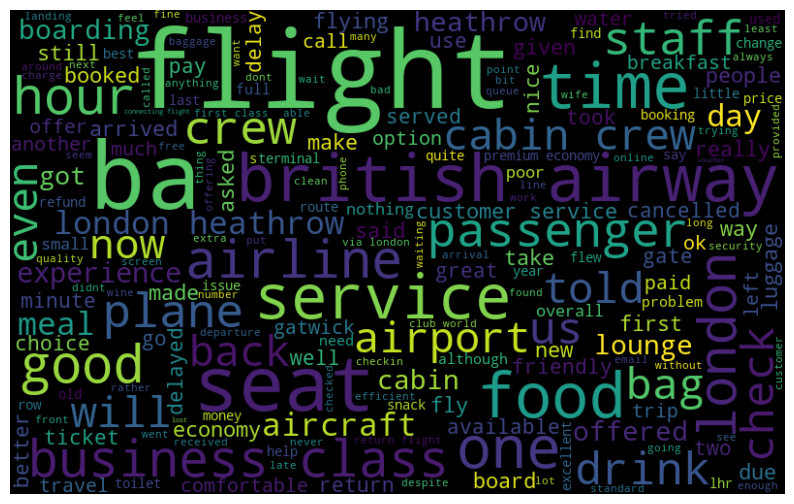

In [63]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

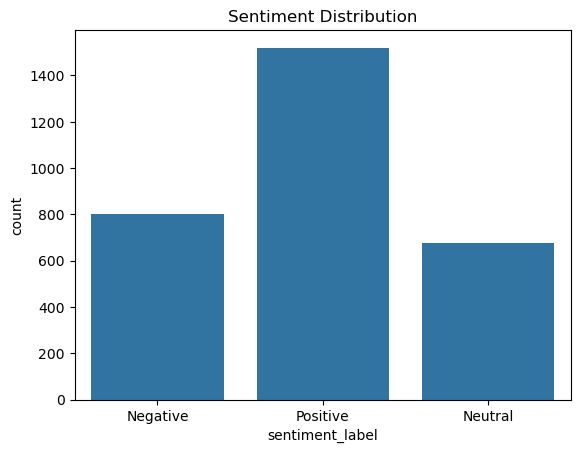

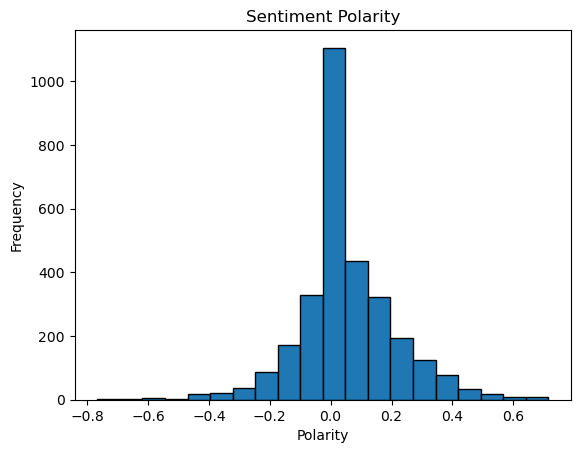

In [64]:
# Countplot for sentiment labels
sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Plot sentiment polarity
plt.hist(df['sentiment'], bins=20, edgecolor='black')
plt.title('Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


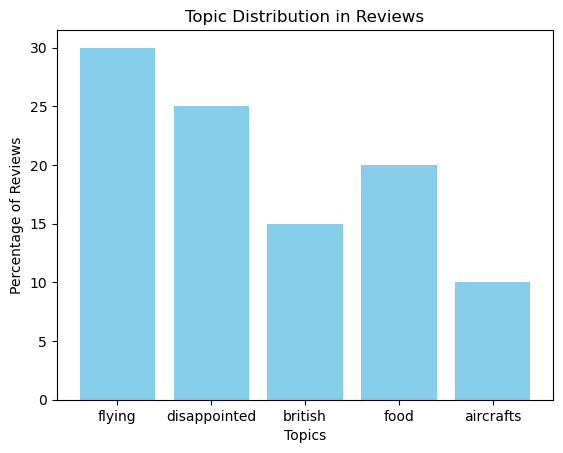

In [73]:
import matplotlib.pyplot as plt

# Example topic distribution (replace with your actual data)
topic_names = ['flying', 'disappointed', 'british', 'food', 'aircrafts']
topic_distribution = [30, 25, 15, 20, 10]  # Percentages

plt.bar(topic_names, topic_distribution, color='skyblue')
plt.title('Topic Distribution in Reviews')
plt.xlabel('Topics')
plt.ylabel('Percentage of Reviews')
plt.show()


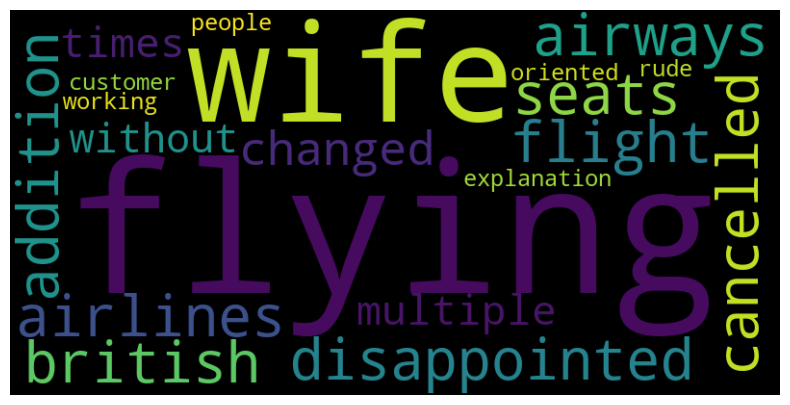

In [72]:
from wordcloud import WordCloud

# Example word cloud for a single topic
wordcloud = WordCloud(width=800, height=400).generate(" ".join(df['tokenized_reviews'][0]))  # Example using topic 0
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [68]:
df['sentiment_label'].value_counts()

sentiment_label
Positive    1520
Negative     802
Neutral      678
Name: count, dtype: int64